In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [ ]:
#load dataset
data = pd.read_csv("/content/US_Accidents_Dec20_updated_sample.csv")

In [ ]:
#explore data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     999 non-null    object 
 1   Severity               999 non-null    int64  
 2   Start_Time             999 non-null    object 
 3   End_Time               999 non-null    object 
 4   Start_Lat              999 non-null    float64
 5   Start_Lng              999 non-null    float64
 6   End_Lat                999 non-null    float64
 7   End_Lng                999 non-null    float64
 8   Distance(mi)           999 non-null    float64
 9   Description            999 non-null    object 
 10  Number                 195 non-null    float64
 11  Street                 999 non-null    object 
 12  Side                   999 non-null    object 
 13  City                   999 non-null    object 
 14  County                 999 non-null    object 
 15  State 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,195.000000,995.000000,551.000000,991.000000,993.000000,994.000000,893.000000,242.000000
mean,2.660661,40.050461,-83.273501,40.053326,-83.272281,1.438440,9192.158974,40.063920,21.575862,71.738648,29.959738,7.717002,10.562038,0.024091
std,0.830267,1.062760,1.691384,1.062773,1.692616,5.282713,13020.302180,15.584337,11.673846,20.487673,0.294437,3.311980,5.604077,0.045959
min,2.000000,38.018460,-85.996350,37.915564,-86.012380,0.000000,5.000000,3.000000,-12.200000,17.000000,28.370000,0.200000,0.000000,0.000000
25%,2.000000,39.170541,-84.521910,39.173671,-84.519410,0.206500,1278.500000,30.000000,13.650000,56.000000,29.800000,5.000000,5.800000,0.000000
50%,2.000000,39.974010,-83.370750,39.974180,-83.369150,0.489000,5501.000000,36.000000,23.000000,76.000000,30.000000,10.000000,9.200000,0.000000
75%,3.000000,41.081570,-81.693076,41.083040,-81.692236,1.358500,10546.500000,53.600000,29.700000,89.000000,30.150000,10.000000,13.800000,0.027500
max,4.000000,41.964290,-80.005270,41.964290,-79.958150,150.138000,63577.000000,80.100000,57.000000,100.000000,30.620000,20.000000,33.400000,0.370000


In [ ]:
# Data Cleaning
# Handle missing values
data.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Severity'], inplace=True)

In [ ]:
# Convert Start_Time and End_Time to datetime objects
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [ ]:
# Extract hour of the day
data['Hour'] = data['Start_Time'].dt.hour

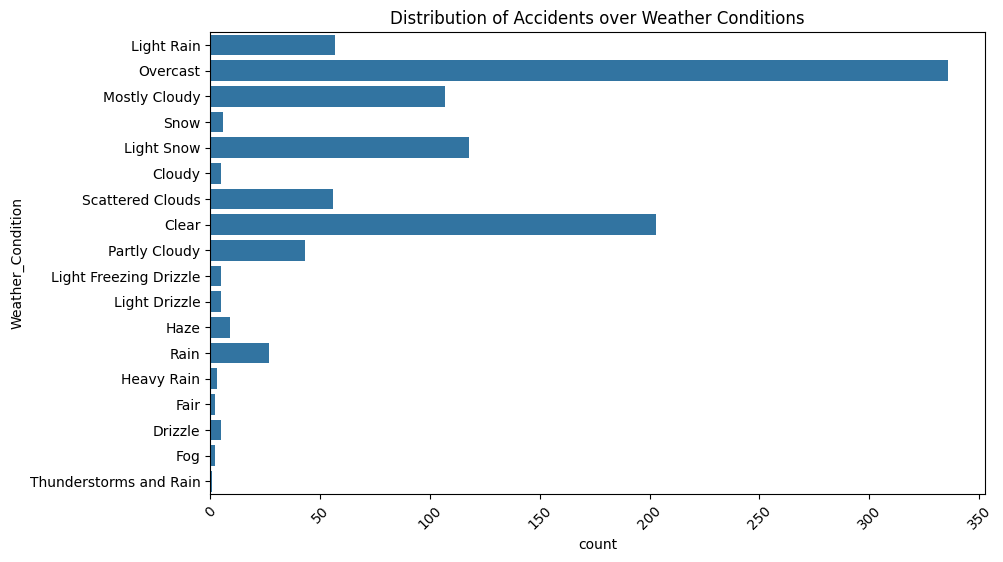

In [ ]:
# Visualize the distribution of accidents over weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data['Weather_Condition'])
plt.title('Distribution of Accidents over Weather Conditions')
plt.xticks(rotation=45)
plt.show()

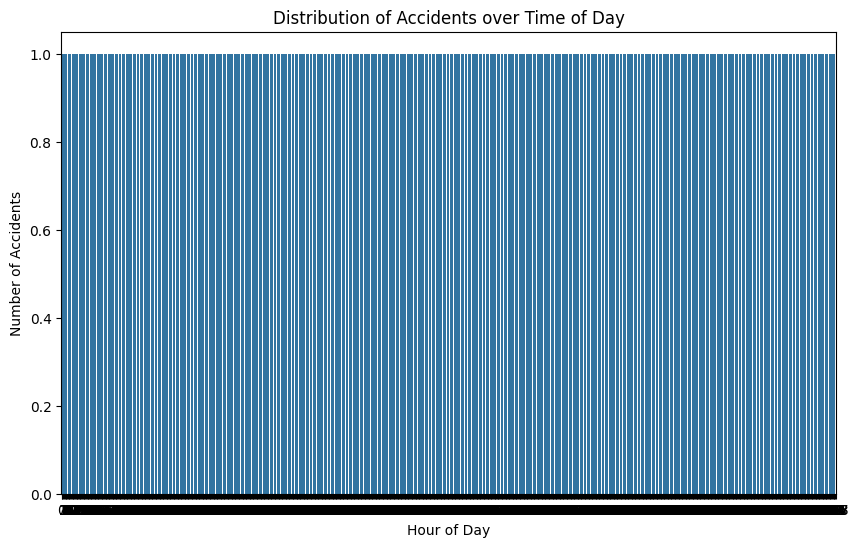

In [ ]:
# Distribution of accidents over different times of the day
plt.figure(figsize=(10, 6))
sns.countplot(data['Hour'])
plt.title('Distribution of Accidents over Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

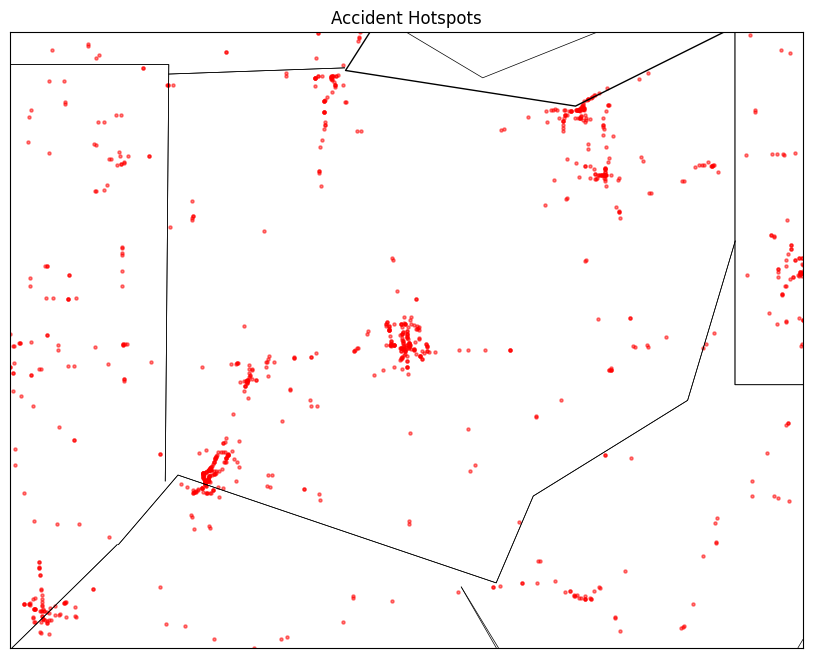

In [ ]:
# Visualize accident hotspots
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=data['Start_Lat'].min(), urcrnrlat=data['Start_Lat'].max(),
            llcrnrlon=data['Start_Lng'].min(), urcrnrlon=data['Start_Lng'].max(), resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
x, y = m(list(data['Start_Lng']), list(data['Start_Lat']))
m.scatter(x, y, s=5, color='red', alpha=0.5)
plt.title('Accident Hotspots')
plt.show()